<a href="https://colab.research.google.com/github/Gustavo-Macedo1/Notebooks-autorais-para-ciencia-de-dados/blob/main/Projeto%20-%20Machine%20Learning%20com%20SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1

In [ ]:
# 0 -> NÃO |||||||||||||||||||| 1 -> SIM

# FEATURES:

# 1 -> rodas grandes
# 2 -> 4 rodas
# 3 -> tem vidro nas janelas de trás
# 4 -> usa gasolina

carro1 = [0,1,1,1]
carro2 = [1,1,1,1]
carro3 = [0,1,1,0]

moto1 = [0,0,0,1]
moto2 = [1,0,0,1]
moto3 = [1,0,0,0]

picape1 = [1,1,0,0]
picape2 = [1,1,1,0]
picape3 = [1,1,0,1]

# Rótulos: 0 -> carro |||||| 1 -> moto |||||| 2 -> picape

train_x = [carro1, carro2, carro3, moto1, moto2, moto3, picape1, picape2, picape3]
train_y = [0,0,0,1,1,1,2,2,2]

Importando a biblioteca SKLearn, criando e treinando modelo

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
model = LinearSVC()

In [ ]:
model.fit(train_x, train_y)

LinearSVC()

In [ ]:
misterio1 = [1,1,0,0]
misterio2 = [0,1,1,1]
misterio3 = [1,0,0,1]

test_x = [misterio1, misterio2, misterio3]
test_y = [1,0,1]

resultado = model.predict(test_x)

- Podemos também verificar a taxa de acerto do algoritmo de classificação:

In [ ]:
comparacao = (test_y == resultado)
comparacao

array([False,  True,  True])

In [ ]:
acertos = comparacao.sum()
total = len(test_y)

taxa_de_acerto = acertos / total
print(f'A taxa de acerto é de {(taxa_de_acerto * 100):.2f}%.')

A taxa de acerto é de 66.67%.


- Podemos fazer isso de outra forma também

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
taxa = accuracy_score(resultado, test_y) * 100
print(f'A taxa de acerto é de {taxa:.2f}%.')

A taxa de acerto é de 66.67%.


# Projeto 2

Qual animal? Gato ou onça?

In [ ]:
# 0 -> Não ||||| 1 -> Sim

# pelo longo?
# manchas?
# corpo grande?
# agressivo?

onca1 = [0,1,1,1]
onca2 = [0,1,0,1]
onca3 = [0,1,1,0]

gato1 = [1,1,0,0]
gato2 = [0,0,0,1]
gato3 = [0,1,0,0]

train_x = [onca1, onca2, onca3, gato1, gato2, gato3]
train_y = [0,0,0,1,1,1] # 0 -> onça ||||| 1 -> gato

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
model = LinearSVC()

In [ ]:
model.fit(train_x, train_y)

LinearSVC()

In [ ]:
model.predict([[1,1,0,1]])

array([1])

Dados brutos -> processamento -> análise exploratória de dados (semântica, insight) -> algoritmo ou modelo de ML -> comunicar, visualizar, reportar resultados || criar data product

# Projeto 3

Importação da base de dados

In [ ]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'

In [ ]:
import pandas as pd
dados = pd.read_csv(url)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


- *Traduzindo* as colunas (para relembrar)
- *Separando* as colunas de atributos da coluna de resultados

In [ ]:
mapa = {
    'home' : 'principal',
    'how_it_works' : 'como_funciona',
    'contact' : 'contato',
    'bought' : 'compras'
}

dados = dados.rename(columns=mapa)
dados.head(4)

,principal,como_funciona,contato,compras
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0


In [ ]:
x = dados[['principal', 'como_funciona', 'contato']]
y = dados['compras']

treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

Treinaremos com 75 elementos e testaremos com 24 elementos.


- Criando modelo
- Treinando e testando modelo
- Verificando confiabilidade

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
modelo = LinearSVC() # Criando modelo

modelo.fit(treino_x, treino_y) # Treinando modelo

previsoes = modelo.predict(teste_x) # Testando modelo

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
confiabilidade = accuracy_score(teste_y, previsoes)

print(f'A confiabilidade do modelo é de {(confiabilidade * 100):.2f}%.')

A confiabilidade do modelo é de 95.83%.


- Trabalhando com split train/test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
SEED = 15
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=SEED)

modelo = LinearSVC() # Criando modelo
modelo.fit(treino_x, treino_y) # Treinando modelo
previsoes = modelo.predict(teste_x) # Testando modelo

confiabilidade = accuracy_score(teste_y, previsoes)
print(f'A confiabilidade do modelo é de {(confiabilidade * 100):.2f}%.', '\n')

print(treino_y.value_counts(), '\n')
print(teste_y.value_counts())

A confiabilidade do modelo é de 100.00%. 

0    48
1    26
Name: compras, dtype: int64 

0    18
1     7
Name: compras, dtype: int64


Para manter a proporção entre os positivos do treino e do teste, precisamos usar o argumento **stratify** da **sklearn.model_selection.train_test_strat.**


Se não fizermos isso, podemos ter treinos com todos os resultados sendo 0 ou 1. Assim, o modelo só vai classificar como 0 ou como 1.

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify=y)

modelo = LinearSVC() # Criando modelo
modelo.fit(treino_x, treino_y) # Treinando modelo
previsoes = modelo.predict(teste_x) # Testando modelo

confiabilidade = accuracy_score(teste_y, previsoes)
print(f'A confiabilidade do modelo é de {(confiabilidade * 100):.2f}%.', '\n')

print(treino_y.value_counts(), '\n')
print(teste_y.value_counts())

A confiabilidade do modelo é de 96.00%. 

0    49
1    25
Name: compras, dtype: int64 

0    17
1     8
Name: compras, dtype: int64


# Projeto 4

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
projetos = pd.read_csv(url)
projetos.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Tradução das colunas usando **rename**

In [ ]:
renomear = {
    'unfinished' : 'nao finalizado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco'
}

projetos = projetos.rename(columns=renomear)

In [ ]:
projetos.head()

,nao finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Agora para deixar a coluna de finalizados mais intuitiva e evitar erros, utilizamos **um novo map para criar uma nova coluna**

In [ ]:
troca = {
    0 : 1,
    1 : 0
}

projetos['finalizado'] = projetos['nao finalizado'].map(troca)

In [ ]:
projetos = projetos.drop(columns='nao finalizado')

In [ ]:
projetos

,horas_esperadas,preco,finalizado
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0
...,...,...,...
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1


Fazendo agora uma análise visual dos dados usando o **Seaborn**.
- horas_esperadas -> **eixo X**
- preco -> **eixo Y**

<Axes: xlabel='horas_esperadas', ylabel='preco'>

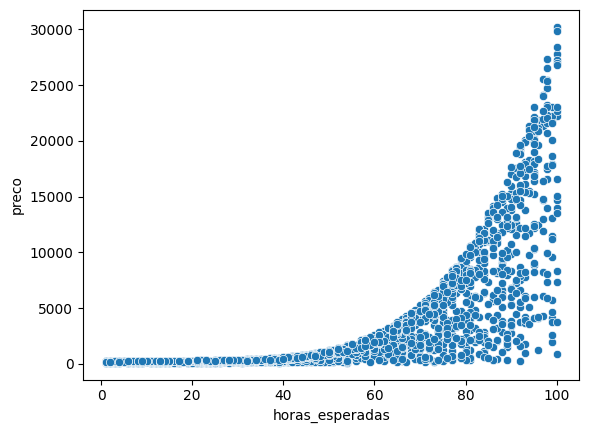

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preco', data=projetos)

Deixando o gráfico acima um pouco mais visual, separando em cores de acordo com o valor da coluna **finalizado**:
- Laranjas = finalizados
- Azuis = não finalizados

<Axes: xlabel='horas_esperadas', ylabel='preco'>

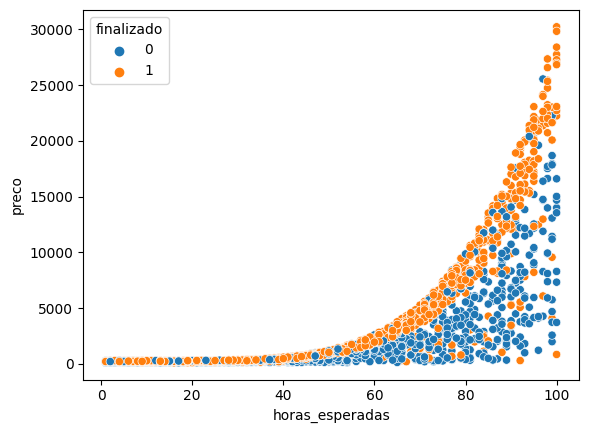

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preco', data=projetos, hue='finalizado')

Podemos também separar os projetos finalizados e não finalizados em **dois gráficos diferentes**, além de ainda deixar a cor diferenciando.
- Para isso saímos do scatterplot e fomos para o **relplot** usando col='finalizado', para dizer que os gráficos devem ser separados de acordo com o valor da coluna 'finalizado'

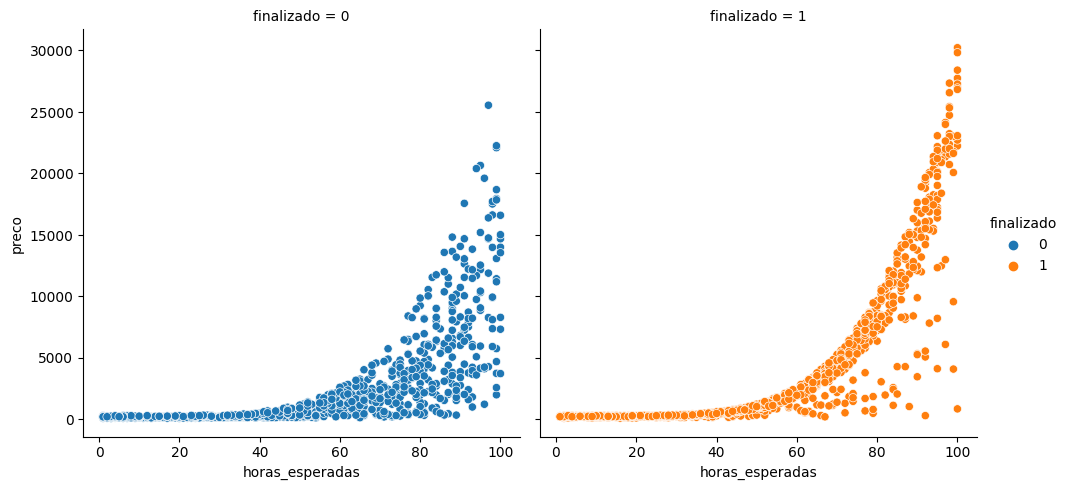

In [ ]:
sns.relplot(x='horas_esperadas', y='preco', data=projetos, col='finalizado', hue='finalizado')

## Treinando modelo de predição
- Vamos treinar um modelo que tente prever se um projeto será vendido ou não.
- Para isso, temos que usar as horas esperadas, o preço e 'finalizado' como dados de treino.
- Em seguida, treinaremos o modelo.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
x = projetos[['horas_esperadas', 'preco']]
y = projetos['finalizado']

SEED = 15
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y, random_state=SEED)

In [ ]:
print(f'Treinaremos com {len(train_x):.2f} elementos.')
print(f'Testeremos com {len(test_x):.2f} elementos.')

modelo = LinearSVC(dual=False)
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

confiabilidade = accuracy_score(test_y, previsoes) * 100
print(f'A confiabilidade do modelo é de {confiabilidade:.2f}%.')

Treinaremos com 1617.00 elementos.
Testeremos com 540.00 elementos.
A confiabilidade do modelo é de 57.41%.


**Baseline**

A baseline é um limiar baixo de confiabilidade. Se o seu modelo é ruim, ele se assemelha a essa baseline. Se for bom, a acurácia do seu modelo é bem melhor que a baseline.

Nesse caso, implementamos a baseline a partir de uma matriz com diversos 1's.

In [ ]:
prev_base = np.ones(540)
baseline = accuracy_score(test_y, prev_base) * 100
print(f"A baseline é de {baseline:.2f}%.")

A baseline é de 52.59%.


## Curva de classificação (DECISION BOUNDARY)

Para visualizar a curva de classificação do modelo acima, devemos manipular algumas matrizes para que se plote a curva desejada usando **matplotlib**.

Vamos começar visualizando os dados do **teste**. Os pontos são coloridos de acordo com o teste_y.

<Axes: xlabel='horas_esperadas', ylabel='preco'>

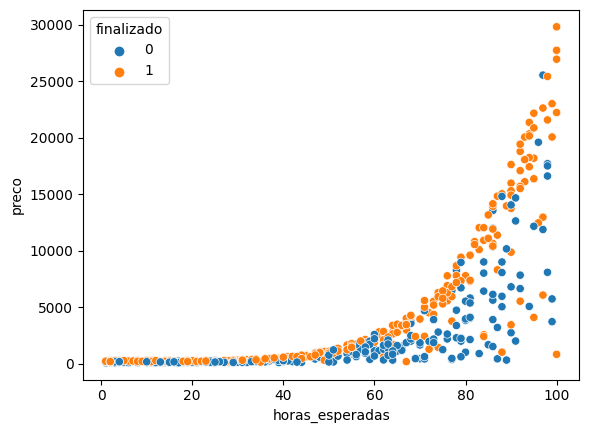

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preco', data=test_x, hue=test_y)

Agora precisamos criar uma matriz de pontos correspondentes a X e Y do gráfico. Faremos na dimensão 100 por 100 (10000 pixels).

1. Criando pontos mínimos e máximos do teste

In [ ]:
min_x = test_x.horas_esperadas.min()
max_x = test_x.horas_esperadas.max()
min_y = test_x.preco.min()
max_y = test_x.preco.max()

print(min_x, max_x, min_y, max_y)

1 100 100 29820


2. Criando eixo com 100 pontos em X e em Y

In [ ]:
eixox = np.arange(min_x, max_x, (max_x - min_x) / 100)
eixoy = np.arange(min_y, max_y, (max_y - min_y) / 100)
eixoy

array([  100. ,   397.2,   694.4,   991.6,  1288.8,  1586. ,  1883.2,
        2180.4,  2477.6,  2774.8,  3072. ,  3369.2,  3666.4,  3963.6,
        4260.8,  4558. ,  4855.2,  5152.4,  5449.6,  5746.8,  6044. ,
        6341.2,  6638.4,  6935.6,  7232.8,  7530. ,  7827.2,  8124.4,
        8421.6,  8718.8,  9016. ,  9313.2,  9610.4,  9907.6, 10204.8,
       10502. , 10799.2, 11096.4, 11393.6, 11690.8, 11988. , 12285.2,
       12582.4, 12879.6, 13176.8, 13474. , 13771.2, 14068.4, 14365.6,
       14662.8, 14960. , 15257.2, 15554.4, 15851.6, 16148.8, 16446. ,
       16743.2, 17040.4, 17337.6, 17634.8, 17932. , 18229.2, 18526.4,
       18823.6, 19120.8, 19418. , 19715.2, 20012.4, 20309.6, 20606.8,
       20904. , 21201.2, 21498.4, 21795.6, 22092.8, 22390. , 22687.2,
       22984.4, 23281.6, 23578.8, 23876. , 24173.2, 24470.4, 24767.6,
       25064.8, 25362. , 25659.2, 25956.4, 26253.6, 26550.8, 26848. ,
       27145.2, 27442.4, 27739.6, 28036.8, 28334. , 28631.2, 28928.4,
       29225.6, 2952

In [ ]:
eixox.shape

(100,)

3. Usando o **np.meshgrid** para fazer dois arrays 100x100, um com 100 valores do eixo x em cada linha e outro com 100 valores do eixo y em cada linha, para depois separá-los em arrays 10000x1 com a funcão **ravel**, e em seguida mescá-los com a função **np.c_**, formando 10000 pontos com coordenadas x e y!

In [ ]:
xx, yy = np.meshgrid(eixox, eixoy)
print(f"Shape: {xx.shape}")
xx

Shape: (100, 100)


array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [ ]:
print(f"Shape: {xx.ravel().shape}")
xx.ravel()

Shape: (10000,)


array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [ ]:
pontos = np.c_[xx.ravel(), yy.ravel()]
print(f"Shape: {pontos.shape}")
pontos

Shape: (10000, 2)


array([[1.00000e+00, 1.00000e+02],
       [1.99000e+00, 1.00000e+02],
       [2.98000e+00, 1.00000e+02],
       ...,
       [9.70300e+01, 2.95228e+04],
       [9.80200e+01, 2.95228e+04],
       [9.90100e+01, 2.95228e+04]])

4. Com as 10000 coordenadas, podemos testar o modelo para cada ponto. As predições sairão em 10000x1, e precisamos trocar para 100x100 utilizando o **reshape**.

In [ ]:
Z = modelo.predict(pontos)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(f'Shape: {Z.shape}')
Z = Z.reshape(xx.shape)
print(f'Novo shape: {Z.shape}')
Z

Shape: (10000,)
Novo shape: (100, 100)


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

5. Para finalizar, plotamos o gráfico do teste juntamente com o **contourf**, função que toma os dois arrays 100x100 e a matriz de treinamento para plotar a curva entre 0s e 1s classificados em cada ponto do mapa.

In [ ]:
import matplotlib.pyplot as plt

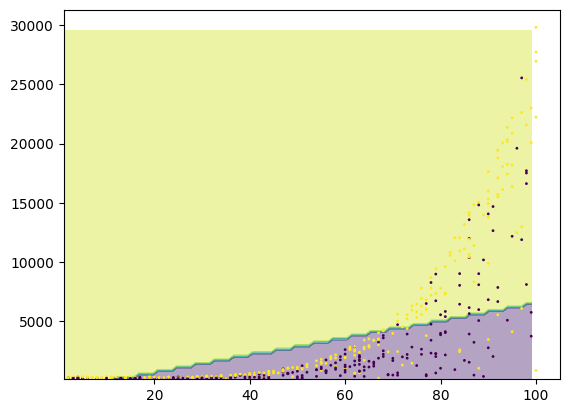

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=1)

Conclui-se, portanto, que a curva do algoritmo é péssima para o problema proposto.

Assim, precisamos abandonar o modelo de regressão linear.

In [ ]:
SEED = 15
np.random.seed(SEED) # MUDANDO A SEED DO NUMPY PARA UMA CONSTANTE

x = projetos[['horas_esperadas', 'preco']]
y = projetos['finalizado']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y) # RANDOM_STATE = SEED

print(f'Treinaremos com {len(train_x):.2f} elementos.')
print(f'Testeremos com {len(test_x):.2f} elementos.')

modelo = LinearSVC(dual=False) # RANDOM_STATE = SEED
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

confiabilidade = accuracy_score(test_y, previsoes) * 100
print(f'A confiabilidade do modelo é de {confiabilidade:.2f}%.')

Treinaremos com 1617.00 elementos.
Testeremos com 540.00 elementos.
A confiabilidade do modelo é de 57.41%.


Tentando com o SVC (não linear)

In [ ]:
SEED = 15
np.random.seed(SEED)

x = projetos[['horas_esperadas', 'preco']]
y = projetos['finalizado']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y) # RANDOM_STATE = SEED

from sklearn.svm import SVC

print(f'Treinaremos com {len(train_x):.2f} elementos.')
print(f'Testeremos com {len(test_x):.2f} elementos.')

modelo = SVC() # RANDOM_STATE = SEED
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

confiabilidade = accuracy_score(test_y, previsoes) * 100
print(f'A confiabilidade do modelo é de {confiabilidade:.2f}%.')

Treinaremos com 1617.00 elementos.
Testeremos com 540.00 elementos.
A confiabilidade do modelo é de 55.19%.


Vamos ver como ele se comporta na curva de decisão

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


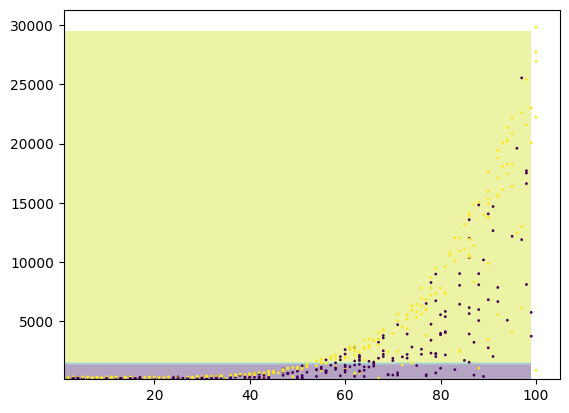

In [ ]:
min_x = test_x.horas_esperadas.min()
max_x = test_x.horas_esperadas.max()
min_y = test_x.preco.min()
max_y = test_x.preco.max()

eixox = np.arange(min_x, max_x, (max_x - min_x) / 100)
eixoy = np.arange(min_y, max_y, (max_y - min_y) / 100)

xx, yy = np.meshgrid(eixox, eixoy)

pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=1)

Como as escalas do eixo X e do eixo Y são muito diferentes, podemos reescalá-las usando o **StandardScaler** da **sklearn.preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
np.random.seed(SEED)

x = projetos[['horas_esperadas', 'preco']]
y = projetos['finalizado']

#ABAIXO MUDAREMOS APENAS OS X

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y) # RANDOM_STATE = SEED

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

from sklearn.svm import SVC

print(f'Treinaremos com {len(train_x):.2f} elementos.')
print(f'Testeremos com {len(test_x):.2f} elementos.')

modelo = SVC() # RANDOM_STATE = SEED
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

confiabilidade = accuracy_score(test_y, previsoes) * 100
print(f'A confiabilidade do modelo é de {confiabilidade:.2f}%.')

Treinaremos com 1617.00 elementos.
Testeremos com 540.00 elementos.
A confiabilidade do modelo é de 67.22%.


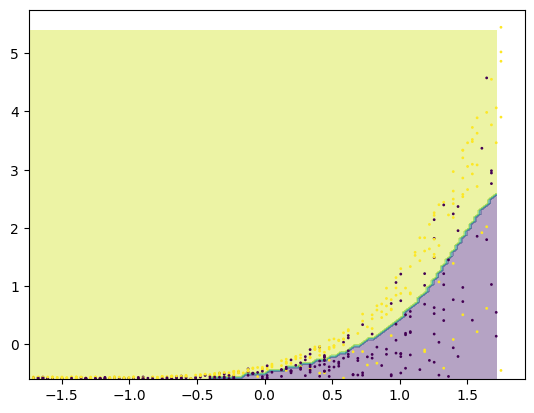

In [ ]:
data_x = test_x[:,0]
data_y = test_x[:,1]

min_x = data_x.min()
max_x = data_x.max()
min_y = data_y.min()
max_y = data_y.max()

eixox = np.arange(min_x, max_x, (max_x - min_x) / 100)
eixoy = np.arange(min_y, max_y, (max_y - min_y) / 100)

xx, yy = np.meshgrid(eixox, eixoy)

pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(data_x, data_y, c=test_y, s=1)

Assim, temos que o gráfico se comporta de uma maneira MUITO melhor, visualmente, em comparação ao modelo anterior.

#Projeto 5

## Importação

In [ ]:
import pandas as pd

In [ ]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
carros = pd.read_csv(url)
carros.head()


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


## Tratamento dos dados

In [ ]:
carros.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Renomeando colunas

In [ ]:
renome = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}

carros = carros.rename(columns=renome)
carros.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Adicionando colunas de **idade_do_modelo** e de **km_por_ano**

In [ ]:
from datetime import datetime
ano_atual = datetime.today().year

carros['idade_do_modelo'] = ano_atual - carros.ano_do_modelo

In [ ]:
carros['km_por_ano'] = carros.milhas_por_ano * 1.60934

In [ ]:
carros.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,yes,23,35085.22134
1,1,7843,1998,40557.96,yes,25,12622.05362
2,2,7109,2006,89627.50,no,17,11440.79806
3,3,26823,2015,95276.14,no,8,43167.32682
4,4,7935,2014,117384.68,yes,9,12770.11290


Excluindo as 3 primeiras colunas

In [ ]:
carros.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], inplace=True)
carros.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,yes,23,35085.22134
1,40557.96,yes,25,12622.05362
2,89627.50,no,17,11440.79806
3,95276.14,no,8,43167.32682
4,117384.68,yes,9,12770.11290


Renomeando os valores da coluna **vendido** como 0 e 1
- 0 = Não vendido
- 1 = Vendido

In [ ]:
mapa = {
    'no' : 0,
    'yes' : 1
}

carros.vendido = carros.vendido.map(mapa)
carros.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


## Modelo

In [ ]:
carros.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


Modelo linear

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
x = carros[['preco', 'idade_do_modelo', 'km_por_ano']]
y = carros['vendido']

SEED = 20
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

print(f'Treinaremos com {len(train_x)} elementos e testaremos com {len(test_x)} elementos.')

modelo = LinearSVC(dual=False)
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes) * 100
print(f'A confiabilidade do modelo é de: {acuracia:.2f}%.')

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A confiabilidade do modelo é de: 65.04%.


In [ ]:
teste_base = np.ones(2500)
baseline = accuracy_score(test_y, teste_base) * 100
print(f'A baseline desse dataset é de: {baseline:.2f}%.')

A baseline desse dataset é de: 58.00%.


Usando um **Dummy Classifier** como uma baseline
- Criar dummy
- Treinar dummy normalmente
- Prever com dummy
- Acurácia dada com o dummy.score(testex, testey) * 100

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()

dummy.fit(train_x, train_y)
previsoes = dummy.predict(test_x)
baseline = dummy.score(test_x, test_y) * 100

print(f'A baseline desse dataset é de: {baseline:.2f}%.')

A baseline desse dataset é de: 58.00%.


Usando um dummy com outra estratégia **(strategy)**

In [ ]:
dummy = DummyClassifier(strategy="stratified")

dummy.fit(train_x, train_y)
previsoes = dummy.predict(test_x)
baseline = dummy.score(test_x, test_y) * 100

print(f'A baseline desse dataset é de: {baseline:.2f}%.')

A baseline desse dataset é de: 51.12%.


Boa prática:
- Utilizar o de maior acurácia

Modelo **NÃO-LINEAR**

Aqui utilizamos a scaler, para que as escalas das variáveis fiquem em um intervalo determinado pela média dividida pelo desvio-padrão.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = carros[['preco', 'idade_do_modelo', 'km_por_ano']]
y = carros['vendido']

SEED = 20
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

print(f'Treinaremos com {len(train_x)} elementos e testaremos com {len(test_x)} elementos.')

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

modelo = SVC()
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes) * 100
print(f'A confiabilidade do modelo é de: {acuracia:.2f}%.')

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A confiabilidade do modelo é de: 75.92%.




---


Agora, vamos incluir também um novo tipo de classificador, que é o **Decision
Tree Classifier**.

- A árvore binária de decisão, além de classificar por si só, também nos mostra quais critérios ela utiliza para classificar, além de outras informações.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

  Agora criamos e treinamos o modelo, como de costume.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# A DECISION TREE NÃO PRECISA DE SCALE

x = carros[['preco', 'idade_do_modelo', 'km_por_ano']]
y = carros['vendido']

SEED = 20
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

print(f'Treinaremos com {len(train_x)} elementos e testaremos com {len(test_x)} elementos.')

modelo = DecisionTreeClassifier()
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes) * 100
print(f'A confiabilidade do modelo é de: {acuracia:.2f}%.')

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A confiabilidade do modelo é de: 71.16%.


Agora vamos exportar o gráfico de visualização para de fato VER a árvore

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# RETORNA UM GRÁFICO EM TEXTO, CHAMADO DE *DOT DATA*
dot_data = export_graphviz(modelo)
# USA O graphviz.Source PARA MOSTRAR O GRAFICO DE UM DOT DATA
grafico = graphviz.Source(dot_data)
grafico

Vamos reduzir o tamanho dessa árvore e costumizar o gráfico através de alguns comandos:

- parâmetro do **MODELO**: 'max_depth = 2'
- parâmetros do **export_graphviz**:  filled=True, rounded=True, class_names=["nao", "sim"], out_file=None, feature_names=x.columns. Respectivamente, fazem:

    1. Preenche com cor
    2. Deixa arredondado
    3. Adiciona o nome das classes e define como 'sim' ou 'nao'
    4. Exporta o gráfico pra lugar nenhum
    5. Ao invés de chamar as features de x[0], chama pelo nome mesmo

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# A DECISION TREE NÃO PRECISA DE SCALE

x = carros[['preco', 'idade_do_modelo', 'km_por_ano']]
y = carros['vendido']

SEED = 20
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

print(f'Treinaremos com {len(train_x)} elementos e testaremos com {len(test_x)} elementos.')

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes) * 100
print(f'A confiabilidade do modelo é de: {acuracia:.2f}%.')

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A confiabilidade do modelo é de: 75.84%.


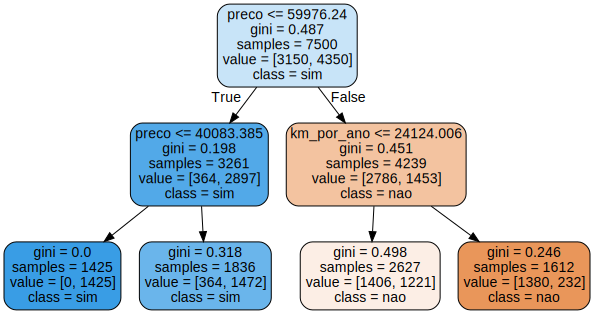

In [ ]:
# AS FEATURES SÃO AS COLUNAS DO X, OU SEJA, DAS ENTRADAS (['preco', 'idade_do_modelo', 'km_por_ano'])
features = x.columns

# RETORNA UM GRÁFICO EM TEXTO, CHAMADO DE *DOT DATA*
dot_data = export_graphviz(modelo,
                           filled=True,
                           rounded=True,
                           class_names=['nao', 'sim'],
                           out_file=None,
                           feature_names=features
                           )
# USA O graphviz.Source PARA MOSTRAR O GRAFICO DE UM DOT DATA
grafico = graphviz.Source(dot_data)
grafico

Quanto mais azul, mais certeza ele tem de que é 'sim'

Quanto mais vermelho, mais certeza tem que 'não'

